## Lead Scoring Case Study

#### Problem Statement:
An education company named X Education sells online courses to industry professionals.

Need to build a model which assigns a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO has given a ballpark of the target lead conversion rate to be around 80%.


The Build model is used by the management to make the process more efficient and understand how exactly the demands vary with different features and accordingly the management can manipulate the business strategy which is used in the conversion of lead to paying customers.


Essentially, the company wants —	
- To identify the most potential leads, also known as ‘Hot Leads’
- To identify the variables that are significant in predicting the lead customers who are most likely to convert into paying       customers.
- To create a Logistic regression Model that quantitatively relates lead customers with variables.
- To know the accuracy of the model, i.e. how well these variables can predict the paying customers.

### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Step 1:Importing the dataset

In [3]:
# Importing dataset
leads_data = pd.read_csv(('Leads.csv'))

### Step 2:Reading and Understanding the Data or Inspecting the Dataframe

In [4]:
# Let's see the head of the dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [6]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Preparation

### Data cleaning
 Fixing the Rows and Columns 

In [8]:
# Deleting the columns which are not necessary for analysis
leads_data.drop(['Lead Number','Do Not Call','Do Not Email'],axis=1,inplace= True)

In [9]:
(round(leads_data.isnull().sum()/len(leads_data),2)*100)

Prospect ID                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

In [10]:
# Deleting the columns which are not necessary for analysis
leads_data.drop(['Receive More Updates About Our Courses','A free copy of Mastering The Interview','I agree to pay the amount through cheque',
              'Last Notable Activity'],axis=1,inplace=True)

In [11]:
#### Deleting the columns which has more null or missing values
leads_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                                   'Asymmetrique Activity Index'],axis=1,inplace = True)

In [12]:
leads_data.drop('Lead Quality',axis =1,inplace= True)

In [13]:
leads_data.drop(['Update me on Supply Chain Content','Get updates on DM Content'],axis =1,inplace=True)

 ### Impute/Remove missing values

In [14]:
(round(leads_data.isnull().sum()/len(leads_data),2)*100)

Prospect ID                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

Dropping the records with 'TotalVisits','Page Views Per Visit' and 'Last Activity' missing.

In [15]:
#drop the rows which has null or missing values in 'TotalVisits','Page Views Per Visit','Last Activity' of leads_data.
leads_data = leads_data[~(leads_data['TotalVisits'].isnull())]
leads_data = leads_data[~(leads_data['Page Views Per Visit'].isnull())]
leads_data = leads_data[~(leads_data['Last Activity'].isnull())]

In [16]:
leads_data.shape

(9103, 23)

#### handling missing values in 'Country' column.

In [17]:
leads_data.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [18]:
# find the mode of Country in leads_data
country_mode = leads_data['Country'].mode()[0]
country_mode

'India'

In [19]:
# fill the "Country" missing values with mode value of Country in leads_data
leads_data['Country'].fillna(country_mode,inplace=True)

In [20]:
leads_data.Country.isnull().sum()

0

In [21]:
leads_data.Specialization.value_counts(normalize=True)

Select                               0.244135
Finance Management                   0.125391
Human Resource Management            0.109228
Marketing Management                 0.107404
Operations Management                0.065172
Business Administration              0.052007
IT Projects Management               0.047706
Supply Chain Management              0.045099
Banking, Investment And Insurance    0.043665
Travel and Tourism                   0.026330
Media and Advertising                0.026330
International Business               0.022941
Healthcare Management                0.020464
E-COMMERCE                           0.014468
Hospitality Management               0.014468
Retail Management                    0.013034
Rural and Agribusiness               0.009515
E-Business                           0.007430
Services Excellence                  0.005214
Name: Specialization, dtype: float64

In [22]:
leads_data = leads_data[~leads_data['Specialization'].isnull()].copy()

In [23]:
leads_data.shape

(7672, 23)

#### handling missing values in 'How did you hear about X Education' column.

In [24]:
leads_data['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.712174
Online Search            0.116957
Word Of Mouth            0.050435
Student of SomeSchool    0.044783
Other                    0.026957
Multiple Sources         0.022029
Advertisements           0.010145
Social Media             0.009565
Email                    0.003623
SMS                      0.003333
Name: How did you hear about X Education, dtype: float64

Drop the records with 'How did you hear about X Education' missing

In [25]:
leads_data = leads_data[~leads_data['How did you hear about X Education'].isnull()].copy()

#### handling missing values in 'What is your current occupation' column.

In [26]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.859397
Working Professional    0.105452
Student                 0.030308
Other                   0.002343
Housewife               0.001406
Businessman             0.001094
Name: What is your current occupation, dtype: float64

In [27]:
current_Occupation_mode = leads_data['What is your current occupation'].mode()[0]
current_Occupation_mode

'Unemployed'

In [28]:
leads_data['What is your current occupation'].fillna(current_Occupation_mode,inplace = True)

In [29]:
leads_data['What is your current occupation'].isnull().sum()

0

#### handling missing values in 'What matters most to you in choosing a course' column.

In [30]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999688
Flexibility & Convenience    0.000156
Other                        0.000156
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
course_mode = leads_data['What matters most to you in choosing a course'].mode()[0]
course_mode

'Better Career Prospects'

In [32]:
leads_data['What matters most to you in choosing a course'].fillna(course_mode,inplace=True)

In [33]:
leads_data['What matters most to you in choosing a course'].isnull().sum()

0

Drop the records with 'Tags' missing

In [34]:
leads_data = leads_data[~leads_data['Tags'].isnull()].copy()

In [35]:
leads_data.Tags.isnull().sum()

0

In [36]:
leads_data.shape

(5702, 23)

In [37]:
leads_data['Lead Profile'].value_counts(normalize = True)

Select                         0.595008
Potential Lead                 0.271225
Other Leads                    0.084373
Student of SomeSchool          0.042187
Lateral Student                0.003691
Dual Specialization Student    0.003516
Name: Lead Profile, dtype: float64

In [38]:
leads_data['City'].value_counts(normalize = True)

Mumbai                         0.406524
Select                         0.294458
Thane & Outskirts              0.099439
Other Cities                   0.085759
Other Cities of Maharashtra    0.056296
Other Metro Cities             0.048053
Tier II Cities                 0.009470
Name: City, dtype: float64

In [39]:
round(leads_data.isnull().sum()/len(leads_data),2)*100

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

Now there are no missing values

#### Converting  binary variables (Yes/No) to 0/1

In [40]:
def myfunc(Adv):
    if Adv['Search'] == 'Yes':
        val = 'Yes'
    elif Adv['Magazine']  == 'Yes':
        val = 'Yes'
    elif Adv['Newspaper Article']  == 'Yes':
        val = 'Yes'
    elif Adv['X Education Forums']  == 'Yes':
        val = 'Yes'
    elif Adv['Newspaper']  == 'Yes':
        val = 'Yes'
    elif Adv['Digital Advertisement']  == 'Yes':
        val = 'Yes'
    elif Adv['Through Recommendations']  == 'Yes':
        val = 'Yes'
    else:
        val = 'No'
    return val

leads_data['Advertisement'] = leads_data.apply(myfunc, axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,Advertisement
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Select,...,No,No,No,No,No,No,Interested in other courses,Select,Select,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,...,No,No,No,No,No,No,Ringing,Select,Select,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,No
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,No,No,No,No,No,No,Ringing,Select,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,...,No,No,No,No,No,No,Will revert after reading the email,Select,Mumbai,No


In [41]:
## Created dummies for the below variables, so we can drop them
#'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' 
leads_data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations'],axis = 1,inplace= True)

In [42]:
leads_data.shape

(5702, 17)

In [43]:
(leads_data['Lead Origin'].value_counts()/len(leads_data))*100

Landing Page Submission    60.838302
API                        30.059628
Lead Add Form               8.716240
Lead Import                 0.385830
Name: Lead Origin, dtype: float64

In [44]:
(leads_data['Lead Source'].value_counts()/len(leads_data))*100

Google               32.269379
Direct Traffic       31.462645
Organic Search       14.030165
Olark Chat           11.802876
Reference             7.646440
Referral Sites        1.192564
Welingak Website      0.578744
Facebook              0.385830
Click2call            0.052613
bing                  0.035075
Social Media          0.035075
Live Chat             0.035075
Pay per Click Ads     0.017538
WeLearn               0.017538
testone               0.017538
Press_Release         0.017538
Name: Lead Source, dtype: float64

In [45]:
(leads_data['Last Activity'].value_counts()/len(leads_data))*100

Email Opened                    38.600491
SMS Sent                        33.584707
Page Visited on Website          7.085233
Olark Chat Conversation          6.348650
Converted to Lead                4.893020
Email Link Clicked               2.893722
Email Bounced                    2.665731
Form Submitted on Website        1.350403
Unreachable                      1.227639
Unsubscribed                     0.719046
Had a Phone Conversation         0.403367
Approached upfront               0.087689
View in browser link Clicked     0.052613
Email Received                   0.035075
Email Marked Spam                0.035075
Visited Booth in Tradeshow       0.017538
Name: Last Activity, dtype: float64

In [46]:
(leads_data['Country'].value_counts()/len(leads_data))*100

India                   96.667836
United States            0.719046
United Arab Emirates     0.666433
Singapore                0.280603
Saudi Arabia             0.280603
United Kingdom           0.192915
Qatar                    0.140302
Australia                0.140302
Hong Kong                0.105226
Oman                     0.087689
Bahrain                  0.087689
France                   0.087689
South Africa             0.052613
Nigeria                  0.052613
Kuwait                   0.052613
Netherlands              0.035075
Canada                   0.035075
Germany                  0.035075
Uganda                   0.035075
Philippines              0.035075
Italy                    0.017538
Indonesia                0.017538
Vietnam                  0.017538
China                    0.017538
Denmark                  0.017538
Sweden                   0.017538
Malaysia                 0.017538
Tanzania                 0.017538
Kenya                    0.017538
Sri Lanka     

In [47]:
(leads_data['Specialization'].value_counts()/len(leads_data))*100

Select                               23.868818
Finance Management                   12.627148
Marketing Management                 11.206594
Human Resource Management            11.171519
Operations Management                 6.506489
Business Administration               5.173623
Supply Chain Management               4.612417
IT Projects Management                4.612417
Banking, Investment And Insurance     4.542266
Media and Advertising                 2.683269
Travel and Tourism                    2.472817
International Business                2.262364
Healthcare Management                 2.104525
Hospitality Management                1.490705
E-COMMERCE                            1.315328
Retail Management                     1.297790
Rural and Agribusiness                0.982112
E-Business                            0.683971
Services Excellence                   0.385830
Name: Specialization, dtype: float64

In [48]:
(leads_data['How did you hear about X Education'].value_counts()/len(leads_data))*100

Select                   75.201684
Online Search            10.084181
Word Of Mouth             4.103823
Student of SomeSchool     4.016135
Other                     2.367590
Multiple Sources          1.894072
Social Media              0.911961
Advertisements            0.841810
Email                     0.368292
SMS                       0.210452
Name: How did you hear about X Education, dtype: float64

In [49]:
(leads_data['What is your current occupation'].value_counts()/len(leads_data))*100

Unemployed              84.356366
Working Professional    11.715188
Student                  3.402315
Other                    0.263066
Housewife                0.157839
Businessman              0.105226
Name: What is your current occupation, dtype: float64

In [50]:
(leads_data['What matters most to you in choosing a course'].value_counts()/len(leads_data))*100

Better Career Prospects      99.964925
Flexibility & Convenience     0.017538
Other                         0.017538
Name: What matters most to you in choosing a course, dtype: float64

In [51]:
(leads_data['Tags'].value_counts()/len(leads_data))*100

Will revert after reading the email                  35.689232
Ringing                                              20.852333
Interested in other courses                           8.418099
Already a student                                     8.155033
Closed by Horizzon                                    5.278850
switched off                                          4.209049
Busy                                                  3.244476
Not doing further education                           2.542967
Lost to EINS                                          2.350053
Interested  in full time MBA                          2.034374
Graduation in progress                                1.946685
invalid number                                        1.455630
Diploma holder (Not Eligible)                         1.104875
wrong number given                                    0.824272
opp hangup                                            0.578744
number not provided                                   0

In [52]:
(leads_data['Lead Profile'].value_counts()/len(leads_data))*100

Select                         59.365135
Potential Lead                 27.060680
Other Leads                     8.418099
Student of SomeSchool           4.209049
Lateral Student                 0.368292
Dual Specialization Student     0.350754
Name: Lead Profile, dtype: float64

In [53]:
(leads_data['City'].value_counts()/len(leads_data))*100

Mumbai                         40.652403
Select                         29.445808
Thane & Outskirts               9.943879
Other Cities                    8.575938
Other Cities of Maharashtra     5.629604
Other Metro Cities              4.805331
Tier II Cities                  0.947036
Name: City, dtype: float64

In [54]:
leads_data['Advertisement'].value_counts()

No     5683
Yes      19
Name: Advertisement, dtype: int64

Deleted the columns from the above statistics whose percentage for the multiple levels of categorical variables are less

In [55]:
leads_data['Advertisement'] = leads_data['Advertisement'].replace({'Yes':1,"No":0})

In [56]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,Advertisement
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,Select,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,Select,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Mumbai,0


In [57]:
leads_data.shape

(5702, 17)

#### For categorical variables with multiple levels, create dummy features 

In [58]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin','Lead Source']],drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,dummy1],axis=1)

In [59]:
leads_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'Advertisement', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone'],
      dtype='object')

In [60]:
# Creating dummy variables for the remaining categorical variables

# Creating dummy variables for the variable 'City'
City = pd.get_dummies(leads_data['City'], prefix='City')
leads_data = pd.concat([leads_data,City], axis=1)
# Creating dummy variables for the variable 'How did you hear about X Education'
sc = pd.get_dummies(leads_data['How did you hear about X Education'], prefix='How did you hear about X Education')
leads_data = pd.concat([leads_data,sc], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
cu = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation')
leads_data = pd.concat([leads_data,cu], axis=1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'
ytc = pd.get_dummies(leads_data['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
leads_data = pd.concat([leads_data,ytc], axis=1)

# Creating dummy variables for the variable 'Tags'
tags = pd.get_dummies(leads_data['Tags'], prefix='Tags')
leads_data = pd.concat([leads_data,tags], axis=1)

# Creating dummy variables for the variable 'Lead Profile'
lp = pd.get_dummies(leads_data['Lead Profile'], prefix='Lead Profile')
leads_data = pd.concat([leads_data,lp], axis=1)


# Creating dummy variables for the variable 'Specialization'
spe = pd.get_dummies(leads_data['Specialization'],prefix='Specialization')
leads_data = pd.concat([leads_data,spe],axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads_data['Last Activity'],prefix='Last Activity')
leads_data = pd.concat([leads_data,la],axis=1)

In [61]:
leads_data.shape

(5702, 128)

In [62]:
###dropping the columns which are not necessary for analysis
leads_data.drop('Last Activity',axis =1,inplace = True)
leads_data.drop('Last Activity_Visited Booth in Tradeshow',axis =1,inplace = True)
leads_data.drop('Last Activity_Unsubscribed',axis =1,inplace = True)
leads_data.drop('Last Activity_Unreachable',axis =1,inplace = True)
leads_data.drop('Last Activity_Email Marked Spam',axis =1,inplace = True)
leads_data.drop('Last Activity_Converted to Lead',axis =1,inplace = True)
leads_data.drop('Last Activity_Email Bounced',axis =1,inplace = True)


In [63]:
leads_data.shape

(5702, 121)

In [64]:
leads_data.drop('Lead Origin',axis =1,inplace = True)
leads_data.drop('Lead Origin_Lead Import',axis =1,inplace = True)

In [65]:
leads_data.columns.tolist()

['Prospect ID',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City',
 'Advertisement',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_testone',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Select',
 'City_Thane & Outskirts',
 'City_Tier II Cities',
 'How did you hea

In [66]:
leads_data.drop('Tags_Already a student',axis =1,inplace=True)
leads_data.drop('Tags_switched off',axis=1,inplace=True)
leads_data.drop('Tags_opp hangup',axis=1,inplace=True)
leads_data.drop('Tags_number not provided',axis=1,inplace=True)
leads_data.drop('Tags_Not doing further education',axis=1,inplace=True)
leads_data.drop('Tags_invalid number',axis=1,inplace=True)
leads_data.drop('Tags_wrong number given',axis=1,inplace=True)
leads_data.drop('Tags_Lost to Others',axis=1,inplace=True)
leads_data.drop('Tags_Lost to EINS',axis=1,inplace=True)
leads_data.drop('Tags_Graduation in progress',axis=1,inplace=True)
leads_data.drop('Tags_Diploma holder (Not Eligible)',axis=1,inplace=True)
leads_data.drop('Tags_Want to take admission but has financial problems',axis=1,inplace=True)
leads_data.drop('Tags_Ringing',axis=1,inplace=True)
leads_data.drop('Tags_Interested in other courses',axis=1,inplace=True)
leads_data.drop('Tags_Interested in Next batch',axis=1,inplace=True)
leads_data.drop('Tags_Closed by Horizzon',axis=1,inplace=True)

In [67]:
leads_data.drop('Lead Source',axis=1,inplace=True)
leads_data.drop('Lead Source_Welingak Website',axis=1,inplace=True)
leads_data.drop('Lead Source_Facebook',axis=1,inplace=True)
leads_data.drop('Lead Source_bing',axis=1,inplace=True)
leads_data.drop('Lead Source_Social Media',axis=1,inplace=True)
leads_data.drop('Lead Source_Live Chat',axis=1,inplace=True)
leads_data.drop('Lead Source_Pay per Click Ads',axis=1,inplace=True)
leads_data.drop('Lead Source_testone',axis=1,inplace=True)
leads_data.drop('Lead Source_WeLearn',axis=1,inplace=True)
leads_data.drop('Lead Source_Press_Release',axis=1,inplace=True)

In [68]:
leads_data.drop('Lead Profile',axis=1,inplace=True)
leads_data.drop('Lead Profile_Select',axis=1,inplace=True)
leads_data.drop('Lead Profile_Student of SomeSchool',axis=1,inplace=True)

In [69]:
leads_data.drop('What is your current occupation_Student',axis=1,inplace=True)
leads_data.drop('What matters most to you in choosing a course_Flexibility & Convenience',axis=1,inplace=True)
leads_data.drop('What matters most to you in choosing a course_Other',axis=1,inplace=True)
leads_data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [70]:
leads_data.drop('How did you hear about X Education',axis=1,inplace=True)

leads_data.drop('What is your current occupation',axis=1,inplace=True)
leads_data.drop('What is your current occupation_Businessman',axis=1,inplace=True)

In [71]:
leads_data.drop('What is your current occupation_Housewife',axis=1,inplace=True)
leads_data.drop('What is your current occupation_Other',axis=1,inplace=True)

In [72]:
leads_data.drop('City',axis=1,inplace=True)
leads_data.drop('City_Tier II Cities',axis=1,inplace=True)
leads_data.drop('City_Select',axis=1,inplace=True)

In [73]:
leads_data.drop('Country',axis=1,inplace=True)

In [74]:
leads_data.drop('How did you hear about X Education_Select',axis=1,inplace=True)
leads_data.drop('Specialization_Select',axis=1,inplace=True)
leads_data.drop('Specialization',axis=1,inplace=True)

In [75]:
leads_data.drop('How did you hear about X Education_Other',axis =1 ,inplace = True)

In [76]:
leads_data.drop('Tags_Busy',axis =1,inplace=True)

In [77]:
leads_data.drop("Tags",axis=1,inplace=True)

In [78]:
leads_data.columns.tolist()

['Prospect ID',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Advertisement',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts',
 'How did you hear about X Education_Advertisements',
 'How did you hear about X Education_Email',
 'How did you hear about X Education_Multiple Sources',
 'How did you hear about X Education_Online Search',
 'How did you hear about X Education_SMS',
 'How did you hear about X Education_Social Media',
 'How did you hear about X Education_Student of SomeSchool',
 'How did you hear about X Education_Word Of Mouth',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Prof

### Checking Outliers

In [79]:
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,Last Activity_Approached upfront,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_View in browser link Clicked
count,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,...,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000
mean,0.455279,3.712908,542.192389,2.571968,0.003332,0.608383,0.087162,0.314626,0.322694,0.118029,...,0.000877,0.028937,0.386005,0.000351,0.013504,0.004034,0.063486,0.070852,0.335847,0.000526
std,0.498040,4.913834,563.470891,2.063820,0.057634,0.488155,0.282098,0.464408,0.467548,0.322670,...,0.029602,0.167645,0.486874,0.018727,0.115430,0.063389,0.243857,0.256601,0.472327,0.022934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,53.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,297.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,1025.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,251.000000,2272.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Test-Train Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
leads_data.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,...,Last Activity_Approached upfront,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# putting feature variables to X

X = leads_data.drop(['Converted','Prospect ID'],axis=1)

In [83]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Approached upfront,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Putting Converted variable to y

y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Step 5: Feature Scaling

In [86]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Approached upfront,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_View in browser link Clicked
5393,0.247772,0.498672,1.167609,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
693,0.057863,0.465309,-0.603375,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1919,-0.701775,-0.958773,-1.245176,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2631,-0.701775,-0.958773,-1.245176,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4933,-0.701775,-0.958773,-1.245176,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
## Checking the Converted Rate
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

45.52788495264819

We have 45% Converted Rate

### Step 6:Model Building
Let's start by splitting the data into a training set and a test set

#### Running First Training Model

In [88]:
import statsmodels.api as sm

In [89]:
# logistic regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3991
Model:                            GLM   Df Residuals:                     3921
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -948.10
Date:                Sun, 25 Jun 2023   Deviance:                       1896.2
Time:                        15:57:55   Pearson chi2:                 4.76e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5951
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.1207      2.064     -1.027      0.304      -6.167       1.925
TotalVisits                                                               0.4604      0.103      4.457      0.000       0.258       0.663
Total Time Spent on Website                                               0.9697      0.066     14.700      0.000       0.840       1.099
Page Views Per Visit                                                     -0.2329      0.091     -2.557      0.011      -0.411      -0.054
Advertisement                                                            -0.1319      0.896     -0.147      0.883      -1.887       1.623
Lead Origin_Landing Page Submission                                       0.0810      0.266      0.305      0.761      -0.440       0.602
Lead Origin_Lead Add Form                                                 5.4389      1.328      4.095      0.000       2.836       8.042
Lead Source_Direct Traffic                                                0.0222      1.098      0.020      0.984      -2.129       2.173
Lead Source_Google                                                        0.3647      1.094      0.333      0.739      -1.780       2.510
Lead Source_Olark Chat                                                    1.1437      1.094      1.045      0.296      -1.001       3.289
Lead Source_Organic Search                                                0.2250      1.104      0.204      0.839      -1.939       2.389
Lead Source_Reference                                                    -1.5556      0.821     -1.895      0.058      -3.164       0.053
Lead Source_Referral Sites                                                0.3721      1.239      0.300      0.764      -2.056       2.800
City_Mumbai                                                              -0.1866      0.272     -0.687      0.492      -0.719       0.346
City_Other Cities                                                        -0.0377      0.317     -0.119      0.905      -0.659       0.584
City_Other Cities of Maharashtra                                          0.1511      0.345      0.439      0.661      -0.524       0.826
City_Other Metro Cities                                                  -0.5985      0.389     -1.540      0.124      -1.360       0.163
City_Thane & Outskirts                                                   -0.5736      0.323     -1.774      0.076      -1.207       0.060
How did you hear about X Education_Advertisements                         0.0391      0.630      0.062      0.950      -1.195       1.273
How did you hear about X Education_Email       

### Step 7: Feature Selection Using RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True, False])

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Advertisement', False, 52),
 ('Lead Origin_Landing Page Submission', False, 44),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 6),
 ('City_Mumbai', False, 53),
 ('City_Other Cities', False, 41),
 ('City_Other Cities of Maharashtra', False, 17),
 ('City_Other Metro Cities', False, 13),
 ('City_Thane & Outskirts', False, 22),
 ('How did you hear about X Education_Advertisements', False, 47),
 ('How did you hear about X Education_Email', False, 3),
 ('How did you hear about X Education_Multiple Sources', False, 10),
 ('How did you hear about X Education_Online Search', False, 54),
 ('How did you hear about X Education_SMS', False, 55),
 ('How did y

In [94]:
col = X_train.columns[rfe.support_]

In [95]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts',
       'How did you hear about X Education_Advertisements',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth',
       'What is your current occupation_Unemployed',
       'What matters most to you in choosing a cou

##### Assessing the model with StatsModels

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3991
Model:                            GLM   Df Residuals:                     3975
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -989.86
Date:                Sun, 25 Jun 2023   Deviance:                       1979.7
Time:                        15:58:22   Pearson chi2:                 4.99e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5865
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9407      0.175    -16.826      0.000      -3.283      -2.598
Total Time Spent on Website                              0.9099      0.060     15.240      0.000       0.793       1.027
Lead Origin_Lead Add Form                                3.4676      0.262     13.246      0.000       2.955       3.981
What is your current occupation_Working Professional     1.4604      0.271      5.388      0.000       0.929       1.992
Tags_Interested  in full time MBA                       -1.9835      0.760     -2.610      0.009      -3.473      -0.494
Tags_Lateral student                                    24.7050   4.32e+04      0.001      1.000   -8.46e+04    8.46e+04
Tags_Shall take in the next coming month                25.4584   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Tags_Will revert after reading the email                 4.7167      0.183     25.739      0.000       4.358       5.076
Lead Profile_Lateral Student                            23.4525   1.75e+04      0.001      0.999   -3.43e+04    3.43e+04
Lead Profile_Potential Lead                              1.0893      0.142      7.682      0.000       0.811       1.367
Specialization_Hospitality Management                   -0.8907      0.442     -2.013      0.044      -1.758      -0.023
Last Activity_Approached upfront                        26.6494   3.69e+04      0.001      0.999   -7.23e+04    7.24e+04
Last Activity_Email Link Clicked                         1.3783      0.332      4.151      0.000       0.727       2.029
Last Activity_Email Opened                               0.8315      0.191      4.352      0.000       0.457       1.206
Last Activity_Page Visited on Website                    0.9455      0.257      3.677      0.000       0.442       1.449
Last Activity_SMS Sent                                   1.1315      0.196      5.759      0.000       0.746       1.517
========================================================================================================================
"""

In [97]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5393    0.972343
693     0.803885
1919    0.048263
2631    0.998631
4933    0.086852
532     0.030996
8389    0.886312
8075    0.999682
993     0.086143
1110    0.995941
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97234326, 0.8038847 , 0.04826273, 0.99863057, 0.08685206,
       0.03099644, 0.88631221, 0.99968176, 0.08614262, 0.99594075])

##### Creating a dataframe with the actual Converted and the predicted probabilities


In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['prospect_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,prospect_ID
0,1,0.972343,5393
1,1,0.803885,693
2,0,0.048263,1919
3,1,0.998631,2631
4,0,0.086852,4933


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,prospect_ID,predicted
0,1,0.972343,5393,1
1,1,0.803885,693,1
2,0,0.048263,1919,0
3,1,0.998631,2631,1
4,0,0.086852,4933,0


In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2071   93]
 [ 280 1547]]


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.906539714357304


### Checking VIFs

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,2.30
8,Lead Profile_Potential Lead,1.65
14,Last Activity_SMS Sent,1.56
1,Lead Origin_Lead Add Form,1.34
2,What is your current occupation_Working Profes...,1.33
12,Last Activity_Email Opened,1.30
0,Total Time Spent on Website,1.18
3,Tags_Interested in full time MBA,1.02
9,Specialization_Hospitality Management,1.02
11,Last Activity_Email Link Clicked,1.02


All variables have a good value of VIF. 
So we need not drop any more variables and we can proceed with making predictions using this model only

In [106]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2071,   93],
       [ 280, 1547]], dtype=int64)

In [107]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.906539714357304

## Metrics beyond simply accuracy

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8467432950191571

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.9570240295748613

In [111]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.042975970425138635


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.9432926829268292


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8809017439387494


### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

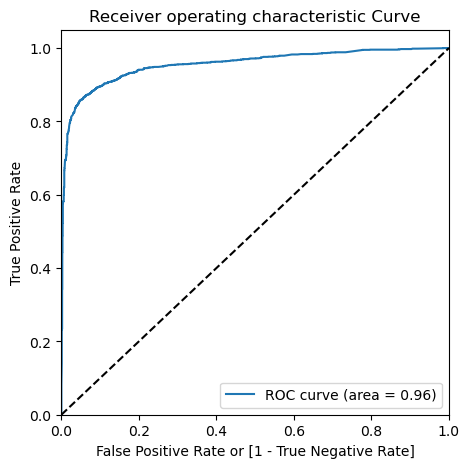

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
- The Optimal cutoff is to check the selected cutoff = 0.5 is good or not

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.972343,5393,1,1,1,1,1,1,1,1,1,1,1
1,1,0.803885,693,1,1,1,1,1,1,1,1,1,1,0
2,0,0.048263,1919,0,1,0,0,0,0,0,0,0,0,0
3,1,0.998631,2631,1,1,1,1,1,1,1,1,1,1,1
4,0,0.086852,4933,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.457780  1.000000  0.000000
0.1   0.1  0.808820  0.956212  0.684381
0.2   0.2  0.870459  0.932677  0.817930
0.3   0.3  0.895264  0.899836  0.891405
0.4   0.4  0.905036  0.873563  0.931608
0.5   0.5  0.906540  0.846743  0.957024
0.6   0.6  0.904786  0.833607  0.964880
0.7   0.7  0.899774  0.811166  0.974584
0.8   0.8  0.896016  0.799672  0.977357
0.9   0.9  0.869957  0.732348  0.986137


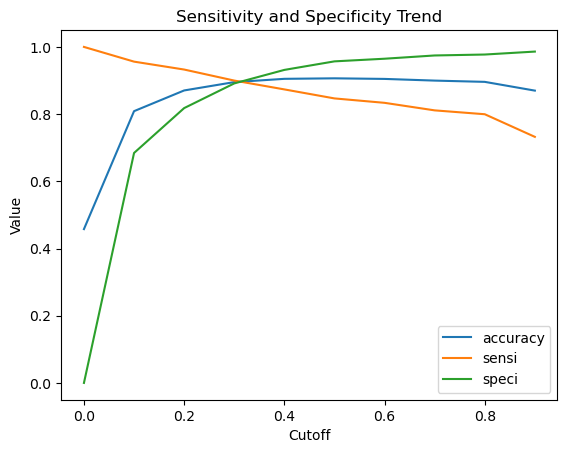

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],title='Sensitivity and Specificity Trend')
plt.xlabel('Cutoff')
plt.ylabel('Value')
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.972343,5393,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.803885,693,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.048263,1919,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.998631,2631,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.086852,4933,0,1,0,0,0,0,0,0,0,0,0,0


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8952643447757455

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1929,  235],
       [ 183, 1644]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of the logistic regression model
TP / float(TP+FN)

0.8998357963875205

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8914048059149723

In [127]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.10859519408502773


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8749334752527941


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9133522727272727


## Precision and Recall

Looking at the confusion matrix again

In [130]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2071,   93],
       [ 280, 1547]], dtype=int64)

##### Precision
TP / TP + FP

In [131]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9432926829268292

##### Recall
TP / TP + FN

In [132]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8467432950191571

Using sklearn utilities for the same

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9432926829268292

In [135]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8467432950191571

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 3986    0
 3987    0
 3988    1
 3989    0
 3990    0
 Name: Converted, Length: 3991, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       0
        ..
 3986    0
 3987    0
 3988    1
 3989    0
 3990    0
 Name: predicted, Length: 3991, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

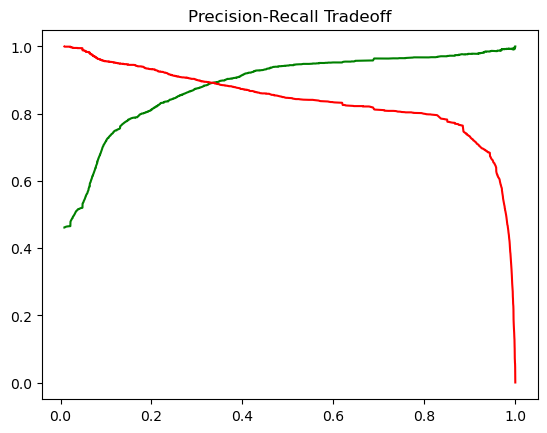

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision-Recall Tradeoff')
plt.show()

### Step 10: Making predictions on the test set

In [140]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [141]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Tags_Interested in full time MBA,Tags_Lateral student,Tags_Shall take in the next coming month,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Specialization_Hospitality Management,Last Activity_Approached upfront,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Page Visited on Website,Last Activity_SMS Sent
2572,-0.741035,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4979,0.553107,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3976,1.587366,0,0,0,0,0,1,0,1,0,0,0,0,0,1
5785,-0.958773,1,1,0,0,0,1,0,1,0,0,0,0,0,1
3458,0.454773,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [142]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [143]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2572    0.058222
4979    0.213173
3976    0.995684
5785    0.999682
3458    0.958327
995     0.903870
6962    0.144296
5294    0.075114
2688    0.995941
9010    0.174109
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
y_pred_1.head()

,0
2572,0.058222
4979,0.213173
3976,0.995684
5785,0.999682
3458,0.958327


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting Prospect ID to index
y_test_df['prospect_ID'] = y_test_df.index

In [148]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

,Converted,prospect_ID,0
0,0,2572,0.058222
1,1,4979,0.213173
2,1,3976,0.995684
3,1,5785,0.999682
4,1,3458,0.958327


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [152]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['prospect_ID','Converted','Converted_Prob'], axis=1)

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,prospect_ID,Converted,Converted_Prob
0,2572,0,0.058222
1,4979,1,0.213173
2,3976,1,0.995684
3,5785,1,0.999682
4,3458,1,0.958327


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [155]:
y_pred_final.head()

,prospect_ID,Converted,Converted_Prob,final_predicted
0,2572,0,0.058222,0
1,4979,1,0.213173,0
2,3976,1,0.995684,1
3,5785,1,0.999682,1
4,3458,1,0.958327,1


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8983050847457628

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[840, 102],
       [ 72, 697]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9063719115734721

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.89171974522293